## Seaborn

In [1]:
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## ヒストグラム: sns.distplot()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='vote_count'>

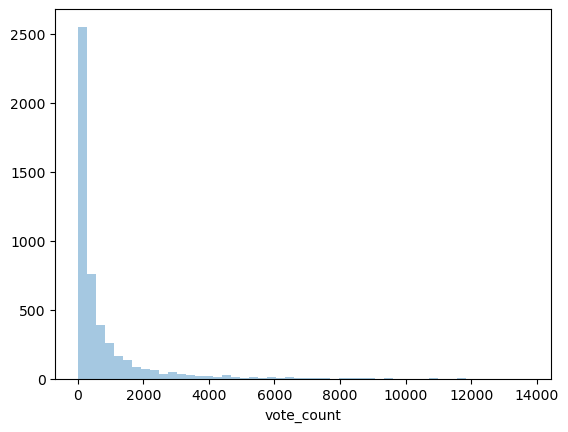

In [7]:
df = pd.read_csv("tmdb_5000_movies.csv")
sns.distplot(df['vote_count'], norm_hist=False, kde=False)

<AxesSubplot:xlabel='vote_count'>

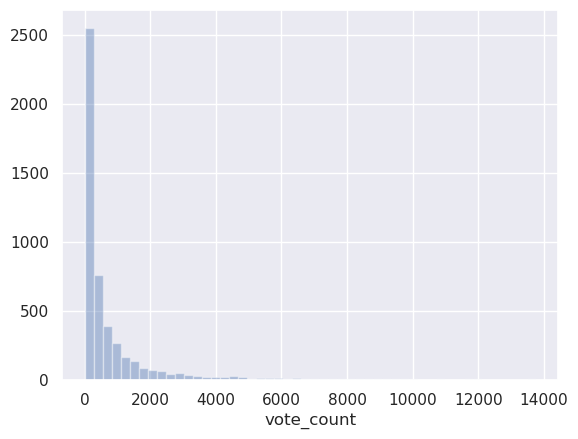

In [9]:
sns.set()
sns.distplot(df['vote_count'], norm_hist=False, kde=False)

## sns.jointplot()

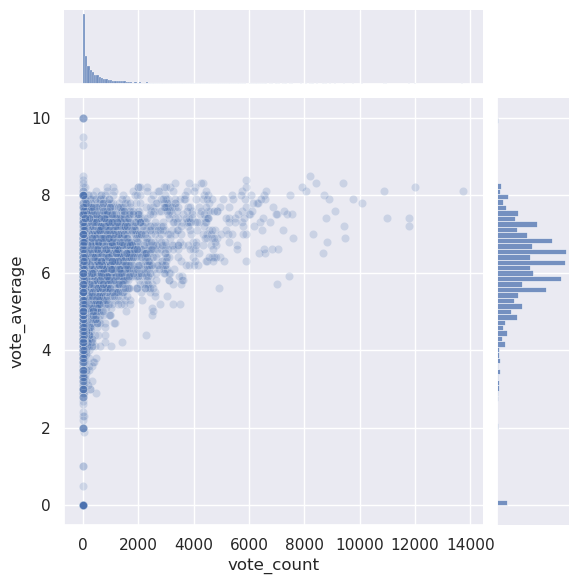

In [11]:
sns.jointplot(x='vote_count', y='vote_average', data=df, alpha=0.2)

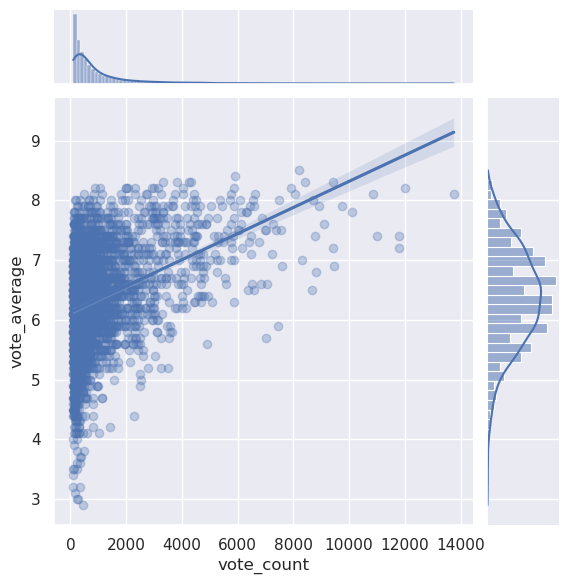

In [22]:
df = pd.read_csv('tmdb_5000_movies.csv')
df = df[df['vote_count'] > 100]
sns.jointplot(x='vote_count', y='vote_average', data=df, kind='reg', joint_kws={'scatter_kws': dict(alpha=0.3)})

## sns.pairplot()

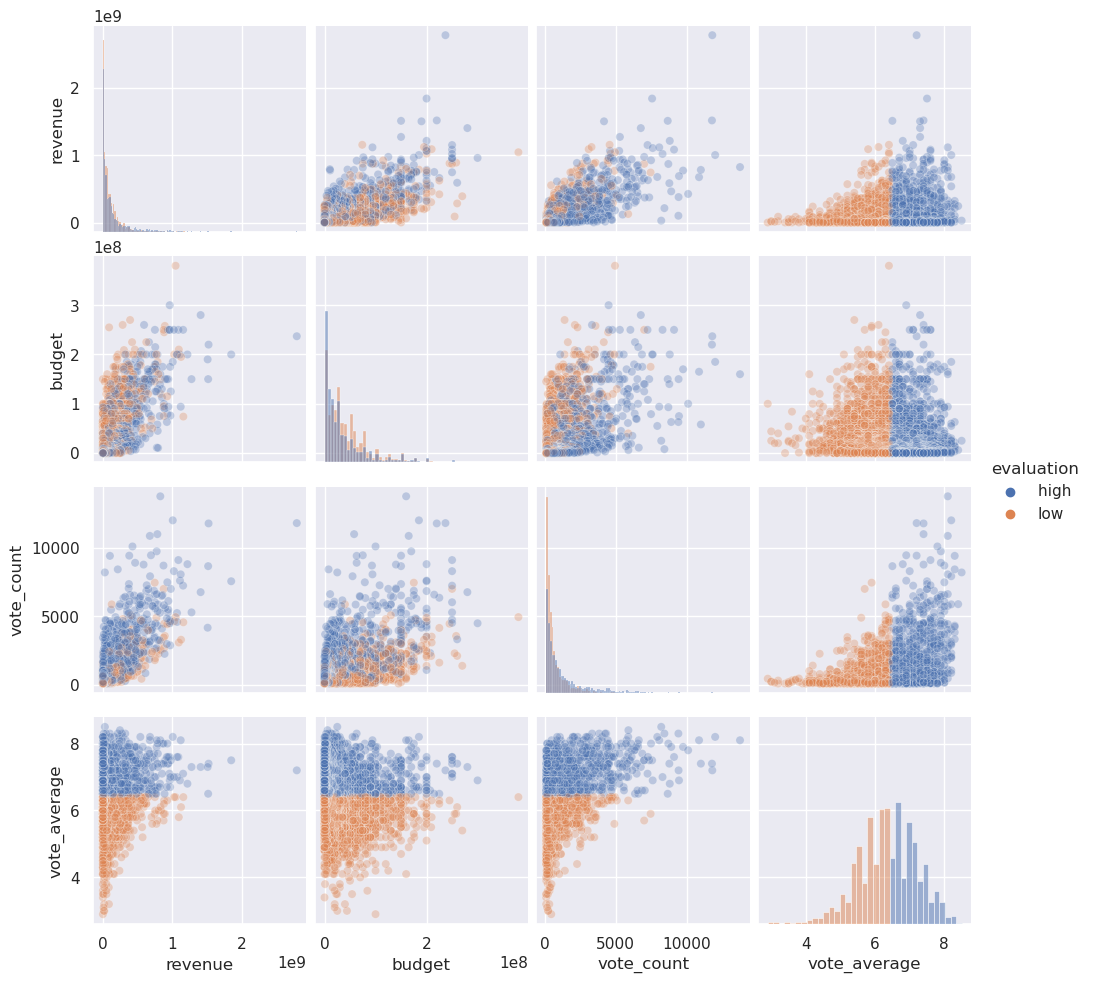

In [37]:
df['evaluation'] = df['vote_average'].apply(lambda x: 'high 'if x > df['vote_average'].median() else 'low')
sns.pairplot(df[['revenue', 'budget', 'vote_count', 'vote_average', 'evaluation']],
            hue='evaluation',
            plot_kws={'alpha':0.3},
            diag_kind='hist')


## sns.barplot()

<AxesSubplot:xlabel='evaluation', ylabel='revenue'>

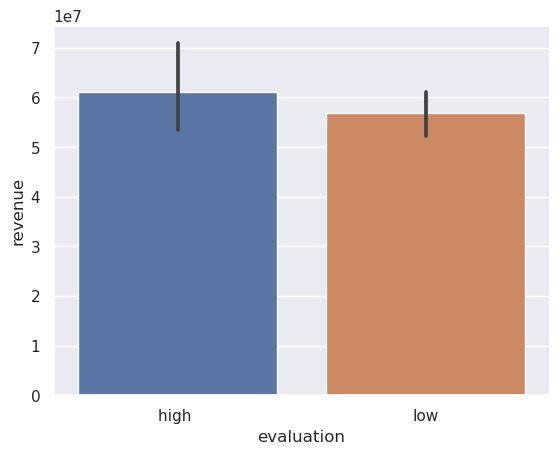

In [41]:
sns.barplot(x='evaluation', y='revenue', data=df, estimator=np.median)

## sns.countplot()

In [42]:
df['year'] = df['release_date'].apply(lambda x: x[:4])

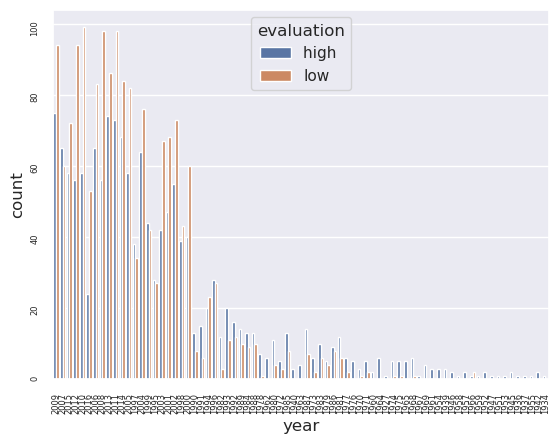

In [48]:
ax = sns.countplot(x='year', data=df, hue='evaluation')
ax.tick_params(rotation=90, labelsize= 6)

<AxesSubplot:xlabel='decade', ylabel='count'>

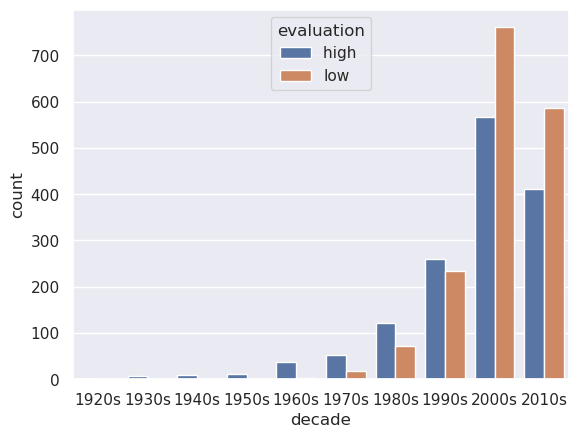

In [55]:
df['decade'] = df['release_date'].apply(lambda x: x[:3] + '0s')
sns.countplot(x='decade', data=df.sort_values('decade'), hue='evaluation')

## sns.boxplot()

<AxesSubplot:xlabel='decade', ylabel='vote_average'>

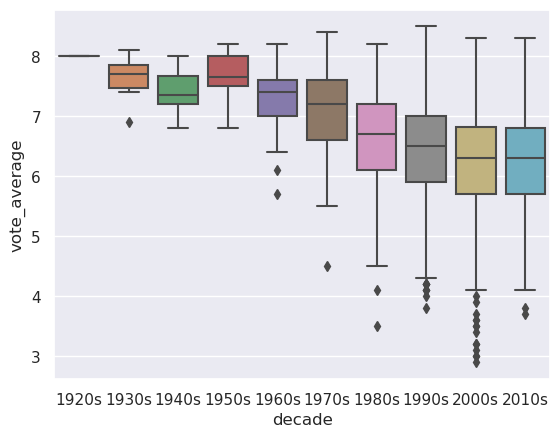

In [57]:
sns.boxplot(x='decade', y='vote_average', data=df.sort_values('decade'))

## sns.violinplot

<AxesSubplot:xlabel='decade', ylabel='vote_average'>

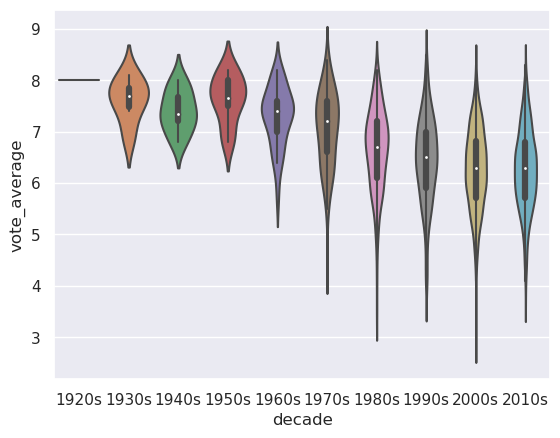

In [58]:
sns.violinplot(x='decade', y='vote_average', data=df.sort_values('decade'))

## sns.swarmplot()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 65.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 85.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 81.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='decade', ylabel='vote_average'>

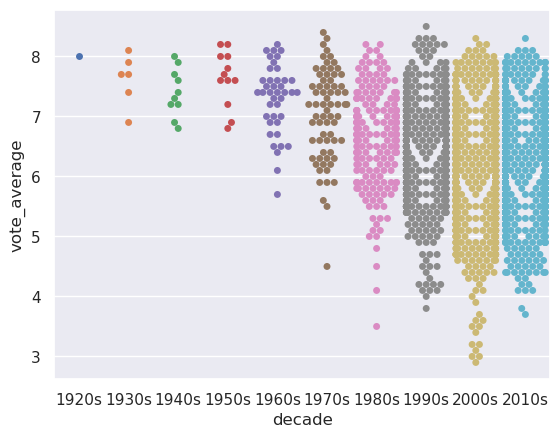

In [59]:
sns.swarmplot(x='decade', y='vote_average', data=df.sort_values('decade'))

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 48.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 37.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='decade', ylabel='vote_average'>

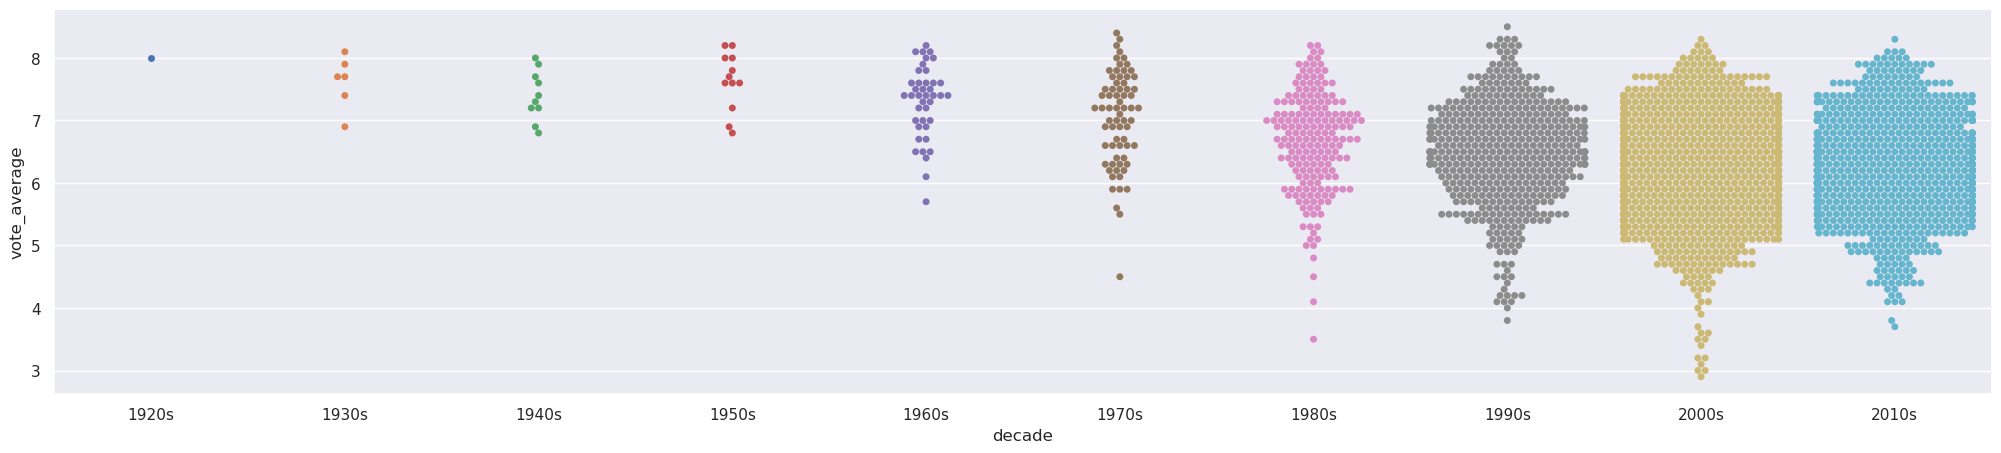

In [62]:
fig, ax = plt.subplots(figsize=(25, 5))
sns.swarmplot(ax=ax, x='decade', y='vote_average', data=df.sort_values('decade'))

## Heatmap

## .corr()

In [70]:
df = pd.read_csv('tmdb_5000_movies.csv')
df = df[(df != 0).all(axis=1)]
df.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.015819,0.431744,0.705306,0.229712,-0.035757,0.539997
id,0.015819,1.000000,0.180645,0.031826,-0.034371,-0.050815,0.109066
popularity,0.431744,0.180645,1.000000,0.602122,0.182388,0.288189,0.749005
revenue,0.705306,0.031826,0.602122,1.000000,0.233236,0.188014,0.756143
runtime,0.229712,-0.034371,0.182388,0.233236,1.000000,0.386199,0.258101
vote_average,-0.035757,-0.050815,0.288189,0.188014,0.386199,1.000000,0.380825
vote_count,0.539997,0.109066,0.749005,0.756143,0.258101,0.380825,1.000000


<AxesSubplot:>

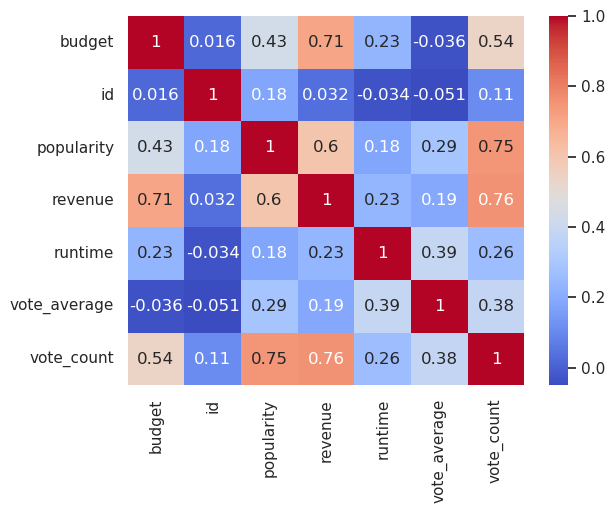

In [74]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<AxesSubplot:xlabel='year', ylabel='month'>

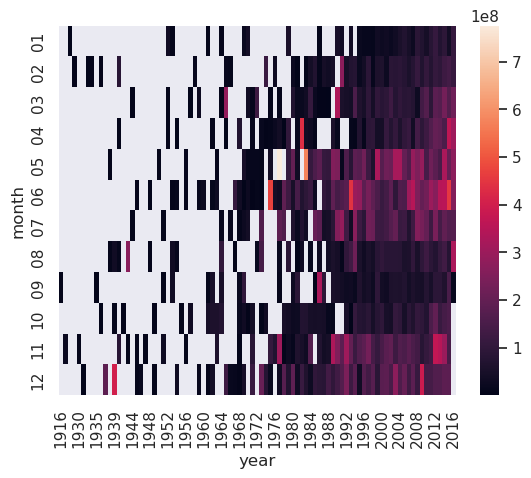

In [84]:
df['year'] = df['release_date'].apply(lambda x: x[:4])
df['month'] = df['release_date'].apply(lambda x: x[5:7])
revenue_df = df.groupby(['year', 'month']).mean()[['revenue']].pivot_table(values='revenue', index='month', columns='year')
sns.heatmap(revenue_df)

## Styleや付属情報

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revenue', ylabel='Density'>

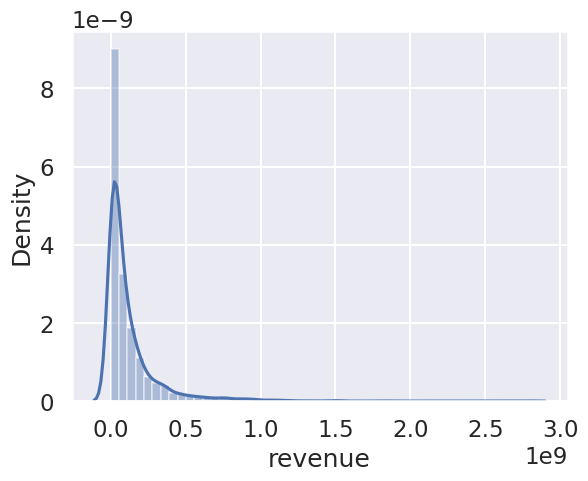

In [87]:
sns.set(context='talk')
sns.distplot(df['revenue'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


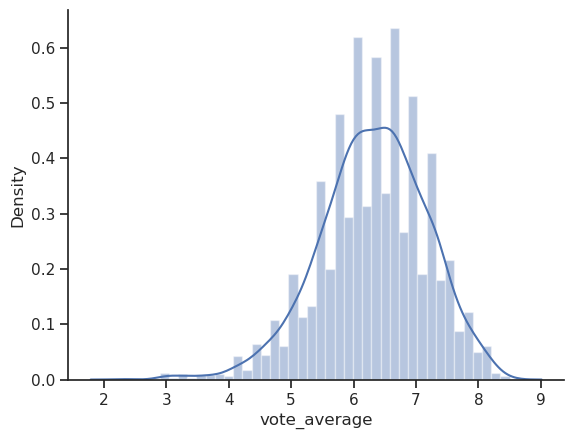

In [90]:
sns.set(context='notebook', style='ticks')
sns.distplot(df['vote_average'])
sns.despine()

<AxesSubplot:xlabel='decade', ylabel='popularity'>

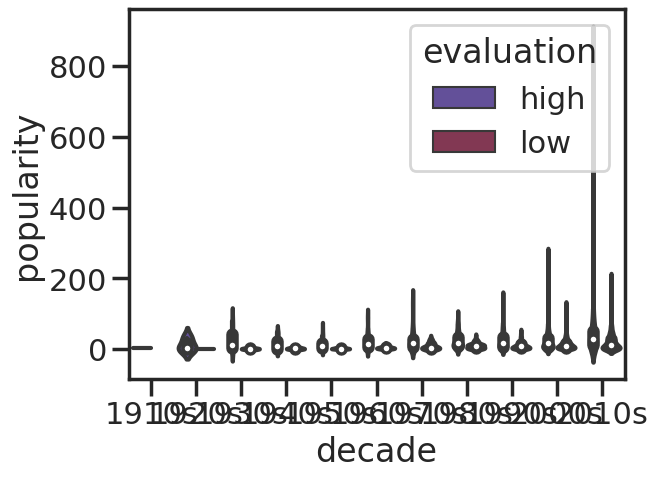

In [99]:
sns.set(context='poster', style='ticks', palette='bright')
df = pd.read_csv('tmdb_5000_movies.csv')
df = df[~df['release_date'].isna()]
df['decade'] = df['release_date'].apply(lambda x: x[:3] + '0s')
df['evaluation'] = df['vote_average'].apply(lambda x: 'high' if x > df['vote_average'].median() else 'low')

sns.violinplot(x='decade', y='popularity', data=df.sort_values('decade'), hue='evaluation', palette='twilight')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'DoS')

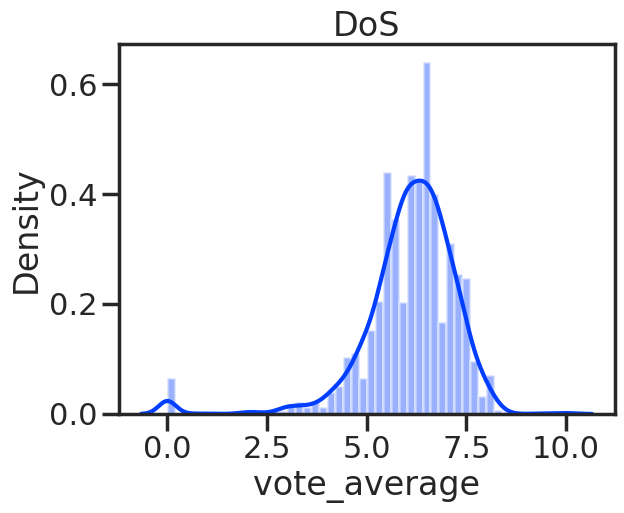

In [101]:
sns.distplot(df['vote_average'])
plt.title('DoS')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='popularity', ylabel='Density'>

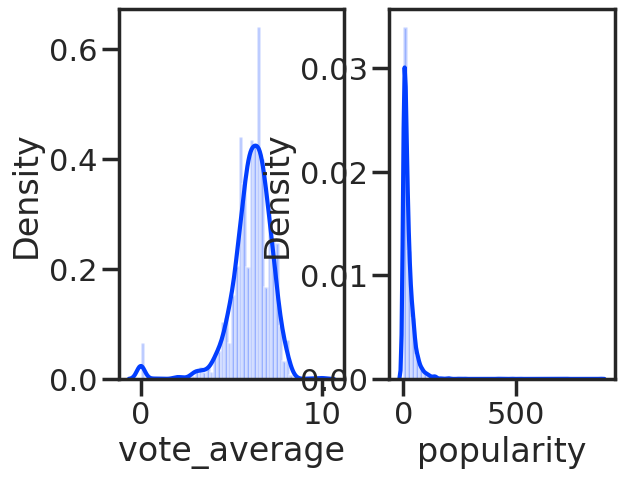

In [103]:
fig, axes = plt.subplots(1, 2)
sns.distplot(df['vote_average'], ax=axes[0])
sns.distplot(df['popularity'], ax=axes[1])